# Latar Belakang

Bank adalah lembaga keuangan yang usaha pokoknya adalah menghimpun dana dari masyarakat dan menyalurkan kembali dana tersebut ke masyarakat serta memberikan jasanya dalam lalulintas pembayaran dan peredaran uang. Pada umumnya Bank dikenal sebagai lembaga keuangan yang kegiatan utamanya menerima simpanan, giro, tabungan dan deposito. Kemudian bank dikenal juga sebagai tempat untuk meminjam uang (kredit) bagi masyarakat yang membutuhkannya. Dengan adanya lembaga keuangan maupun non keuangan yang menjadi pilar perekonomian di Indonesia menjadikan banyak lembaga keuangan yang tumbuh didaerah daerah. Bank Perkreditan 
Rakyat merupakan salah satu lembaga keuangan yang ada di Indonesia.

Persaingan antar-bank saat ini menjadi sangat tinggi membuat setiap perusahaan harus memiliki strategi pemasaran produk perbankannya. Segmentasi pasar adalah salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. n. Alternatif strategi terhadap kegiatan pemasaran yang dilakukan sangat diperlukan agar perusahaan semakin tumbuh dan berkembang. Strategi pemasaran yang tepat dengan menetapkan segementasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

**Objektif** dari project ini adalah mengelompokkan pengguna kartu kredit berdasarkan karakteristik teretntu ke dalam beberapa klaster.

# Dataset

Dataset pada project ini menggunakan credit card dataset pada kaggle https://www.kaggle.com/arjunbhasin2013/ccdata. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

# Import Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

import pickle

# Data Loading

In [3]:
df = pd.read_csv("Dataset/CC-GENERAL.csv")

Melihat 5 data teratas

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Melihat 5 data terbawah

In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


> Terlihat bahwa dalam dataset terdapat missing value

In [6]:
print("Terdapat", df.shape[0], "baris dan", df.shape[1], "kolom dalam dataset")
print("Kolom : " , df.columns)

Terdapat 8950 baris dan 18 kolom dalam dataset
Kolom :  Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


> Dalam dataset ini terdapat 8950 baris dan 18 kolom

Melihat informasi dalam dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

> Dalam dataset ini terdapat variabel kategorik yaitu object (CUST_ID) dan numerik yaitu float64 dan int64, dan terdapat nilai yang hilang karena jumlah non-null tidak sesuai dengan jumlah entri.
- int64 : CASH_ADVANCE_TRX, PURCHASES_TRX, TENURE
- float64 : Kolom yang tidak termasuk kedalam int64 merupakan tipe data float.

Melihat kolom unik dalam dataset

In [8]:
kolom_unik = df.nunique().sort_values(ascending=False)
kolom_unik = pd.DataFrame(kolom_unik, columns = ["Kolom Unik"])
kolom_unik

,Kolom Unik
CUST_ID,8950
BALANCE,8871
PAYMENTS,8711
MINIMUM_PAYMENTS,8636
PURCHASES,6203
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
ONEOFF_PURCHASES,4014
CREDIT_LIMIT,205
PURCHASES_TRX,173


Melihat Missing value pada dataset

In [9]:
df_null = round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)
df_null = pd.DataFrame(df_null, columns = ["Missing Values"])
df_null

,Missing Values
MINIMUM_PAYMENTS,3.50
CREDIT_LIMIT,0.01
CUST_ID,0.00
BALANCE,0.00
PRC_FULL_PAYMENT,0.00
PAYMENTS,0.00
PURCHASES_TRX,0.00
CASH_ADVANCE_TRX,0.00
CASH_ADVANCE_FREQUENCY,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,0.00


> Terlihat bahwa terdapat dua kolom dengan missing value yaitu **MINIMUM_PAYMENTS** & **CREDIT_LIMIT**

Melihat statistik deskriptif

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Cleaning

### Mengecek data duplikat

In [11]:
df.duplicated().any()

False

In [12]:
df.duplicated().sum()

0

> Tidak ada duplikat data

### Menangani missing value

In [13]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [14]:
df_null = round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)
df_null = pd.DataFrame(df_null, columns = ["Missing Values"])
df_null

,Missing Values
CUST_ID,0.0
BALANCE,0.0
PRC_FULL_PAYMENT,0.0
MINIMUM_PAYMENTS,0.0
PAYMENTS,0.0
CREDIT_LIMIT,0.0
PURCHASES_TRX,0.0
CASH_ADVANCE_TRX,0.0
CASH_ADVANCE_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


> sudah tidak ada missing value

# Exploratory data analysis

### Melihat statistik deskriptif pada dataset

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


> Terlihat bahwa dalam dataset:
>    1. Saldo/Balance rata-rata yaitu 1564 dan saldo maksimal yaitu  19043.
>    2. Saldo yang diperbarui memiliki skor rata-rata 0,87
>    3. Pembelian/Purchases dengan maksimal 49039
>    4. Credit limit dengan minimal 50 dan maksimal 30000
>    5. Payments rata-rata yairu 1733.

### Correlation Matrix

In [16]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


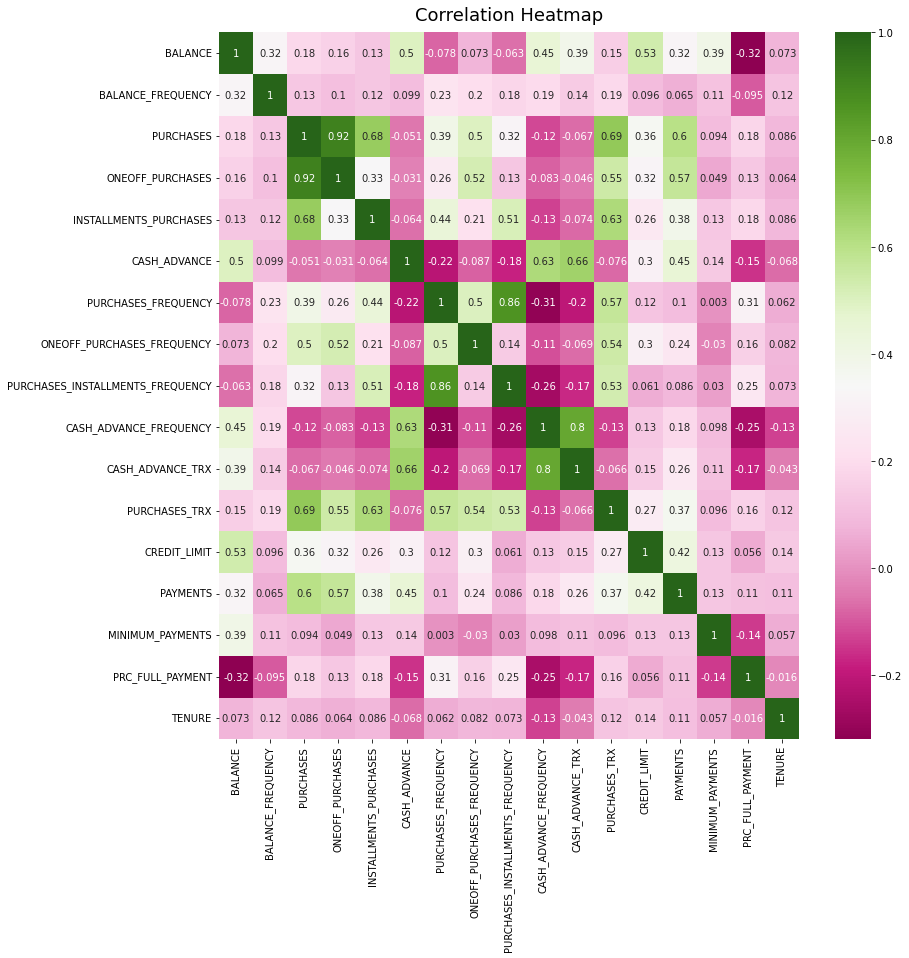

In [17]:
plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='PiYG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

> Dalam heatmap tersebut, terlihat bahwa terdapat kolerasi yang cukup tinggi antar kolom
> - PURCHASES dan ONEOFF_PURCHASES
> - PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY
> - CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX

# Data Preprocessing

In [18]:
df.drop(['CUST_ID','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX','ONEOFF_PURCHASES'], axis=1, inplace=True)

In [19]:
df.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6866,1154.241515,1.000000,102.00,0.00,98.317922,0.166667,0.166667,0.166667,2,1200.0,312.440002,754.478004,0.000000,12
8268,324.479364,0.500000,0.00,0.00,1156.870667,0.000000,0.000000,0.500000,0,2500.0,0.000000,864.206542,0.000000,6
7501,28.800710,0.727273,173.02,173.02,0.000000,0.500000,0.000000,0.000000,6,1000.0,229.503322,133.442390,0.272727,12
7383,158.512412,0.454545,713.64,0.00,0.000000,0.083333,0.083333,0.000000,2,3000.0,1121.322787,96.145734,0.000000,12
1070,1050.926790,1.000000,150.00,150.00,114.462798,0.500000,0.000000,0.083333,6,1000.0,238.619393,5303.958597,0.000000,12


In [20]:
# Standardize data
scaler = StandardScaler() 
scaled = scaler.fit_transform(df) 

In [21]:
# Statistics of scaled data
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [22]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 

In [23]:
normalized_df = pd.DataFrame(normalized_df,columns = df.columns)
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.339375,-0.115646,-0.196998,-0.161845,-0.216417,-0.373916,-0.314650,-0.313114,-0.237071,-0.445289,-0.245252,-1.441749e-01,-0.243663,0.167223
1,0.228862,0.039064,-0.136554,-0.132198,0.757754,-0.355308,-0.197366,0.166918,-0.172104,0.200268,0.238075,2.597292e-02,0.068117,0.104892
2,0.132554,0.153587,-0.031919,-0.134760,-0.138380,0.376449,0.792552,-0.200209,-0.032319,0.244888,-0.113780,-3.013834e-02,-0.155801,0.106924
3,0.023303,-0.482664,0.110139,-0.215750,-0.174970,-0.481323,-0.189524,-0.122885,-0.261783,0.392064,-0.284148,2.315333e-17,-0.249436,0.171185
4,-0.170788,0.246624,-0.219956,-0.216392,-0.222204,-0.482755,-0.190088,-0.321487,-0.262562,-0.431029,-0.173450,-1.265249e-01,-0.250179,0.171695


# Modeling

### Menentukan Jumlah Klaster Optimal menggunakan Metode Kurva Elbow

In [24]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(normalized_df)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,8734.586907
2,6951.038571
3,6011.312133
4,5240.574589
5,4649.914620
6,4231.004827
7,3893.849209
8,3668.548003
9,3469.758724


Text(0, 0.5, 'Intertia')

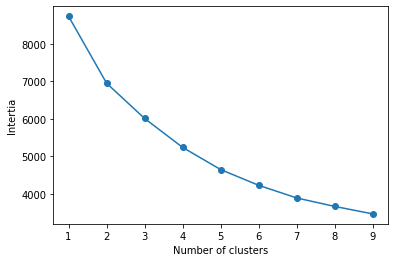

In [25]:
# fitting multiple k-means algorithms and storing the values in an empty list 
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(normalized_df)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure()
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

> Berdasarkan plot di atas, dapat dilihat secara grafis bahwa klaster berjumlah 4 adalah yang paling optimal

### K-Means

In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++')
model1 = kmeans.fit(normalized_df)
label = kmeans.predict(normalized_df)

### K-Medoids

In [27]:
kmedoids = KMedoids(n_clusters=4, random_state=0)
model2 = kmedoids.fit(normalized_df)
label2 = kmedoids.predict(normalized_df)

# Evaluasi Model

In [28]:
ss_k1 = silhouette_score(normalized_df, label)
ss_k2 = silhouette_score(normalized_df, label2)

In [29]:
model_selection = pd.DataFrame({'Silhouette Score': [ss_k1,ss_k2]}, 
                               index = ['K-means','K-Medoids'])
model_selection

,Silhouette Score
K-means,0.216389
K-Medoids,0.214975


> Dari evaluasi silhouette_score terlihat bahwa **algoritma k-means memiliki nilai lebih tinggi dari k-medoids**. maka dari itu kita akan menggunakan k-means.

### Melihat nilai rata-rata pada kolom berdasarkan klaster

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [normalized_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.092761,0.226601,-0.183717,-0.192429,-0.129267,-0.388651,-0.220477,-0.059946,-0.237084,-0.266604,-0.176006,-0.062782,-0.237769,0.120409
1,0.279605,0.112834,-0.077561,-0.083890,0.274374,-0.156303,-0.083565,0.353881,-0.099885,0.135648,0.069133,0.066419,-0.127907,-0.029101
2,-0.095706,0.147945,0.083836,0.104634,-0.135410,0.342955,0.156504,-0.170993,0.144201,-0.017167,-0.025470,-0.040511,0.078678,0.061210
3,-0.228985,-0.566524,-0.098522,-0.089140,-0.109176,-0.136207,-0.143435,-0.162721,-0.129152,-0.088112,-0.094680,-0.090402,0.061913,-0.025167


In [31]:
# Invers data yang telah distandarisasi untuk lebih memahami karaktersitik klaster
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed, columns = [normalized_df.columns])
cluster_centers_inversed

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1371.399873,0.930950,610.690756,237.056331,707.791324,0.334366,0.136685,0.123148,8.816812,3524.435754,1223.624612,717.896343,0.084171,11.678456
1,2146.448514,0.904000,837.494265,335.207357,1554.246173,0.427619,0.177529,0.205959,12.227072,4987.993614,1933.278543,1018.992610,0.116304,11.478373
2,1365.270092,0.912318,1182.321330,505.686920,694.910954,0.627995,0.249146,0.100927,18.294123,4431.989000,1659.411622,769.796309,0.176727,11.599233
3,1087.862037,0.743066,792.711426,330.459378,749.924781,0.435684,0.159668,0.102582,11.499608,4173.861884,1459.053913,653.529478,0.171823,11.483639


### Membuat kolom cluster pada dataframe

In [32]:
# Membuat kolom keterangan klaster pada dataframe
df_clusters = pd.concat([df, pd.DataFrame({'cluster':label})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,0


In [37]:
df_clusters.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster'],
      dtype='object')

### Clusters visualization

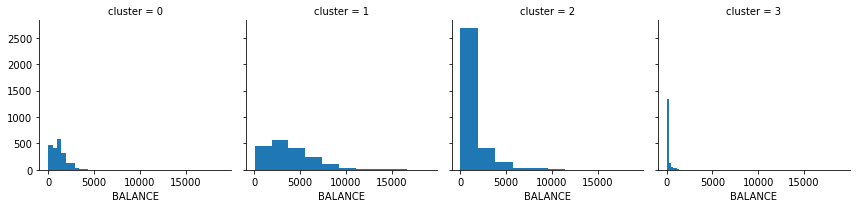

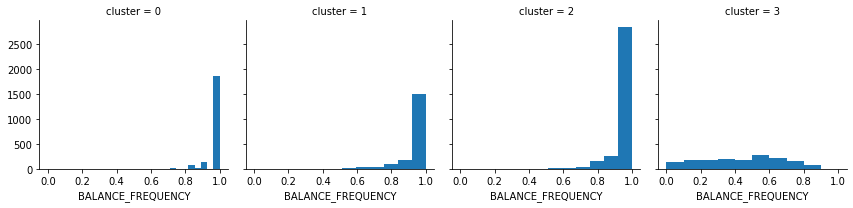

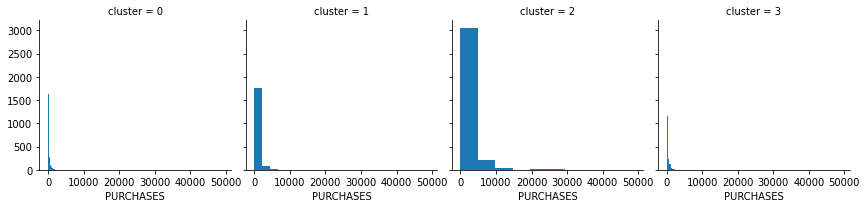

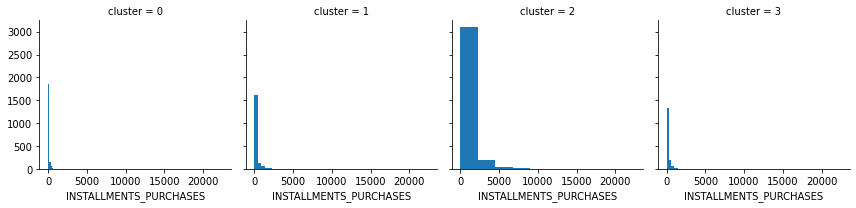

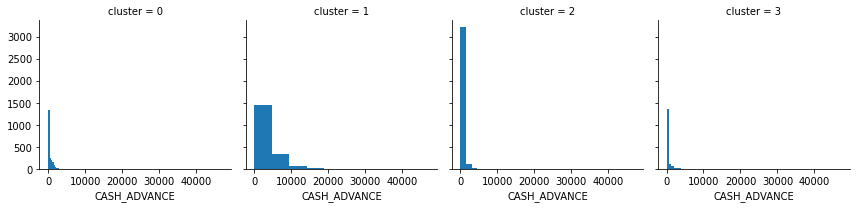

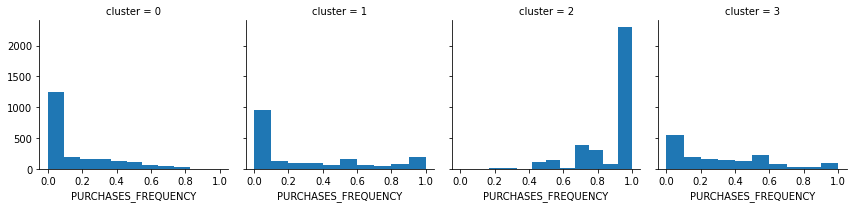

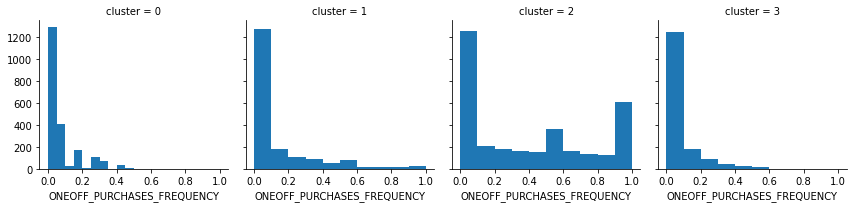

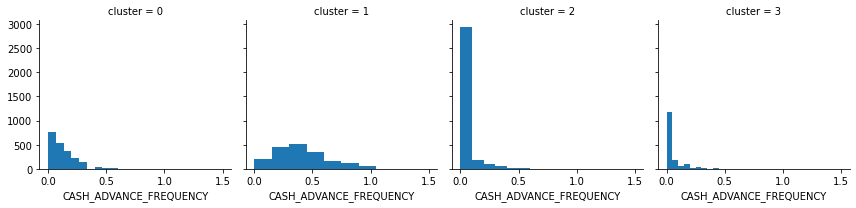

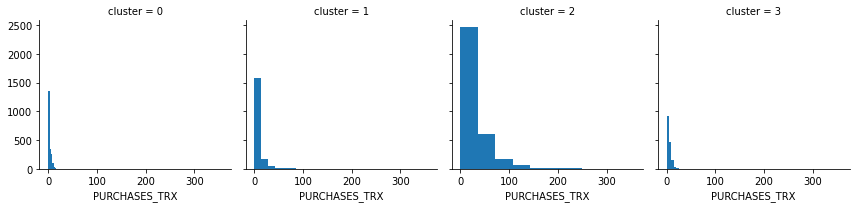

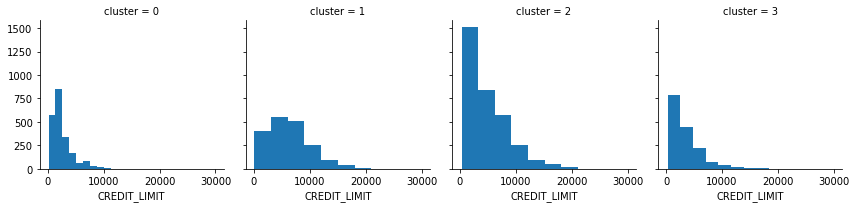

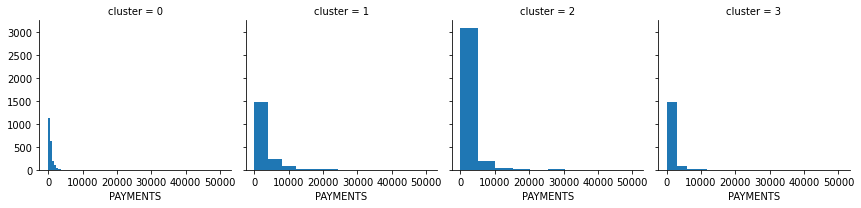

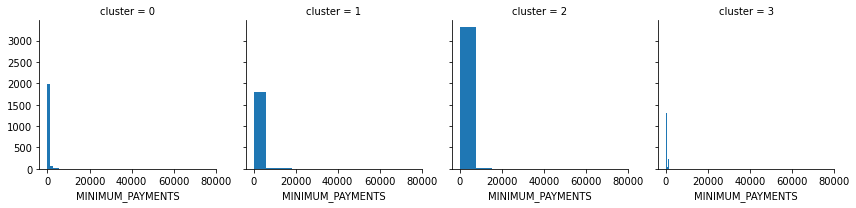

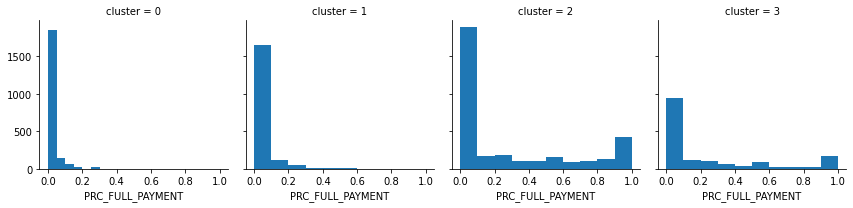

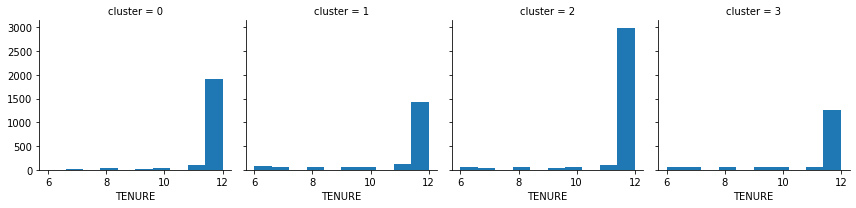

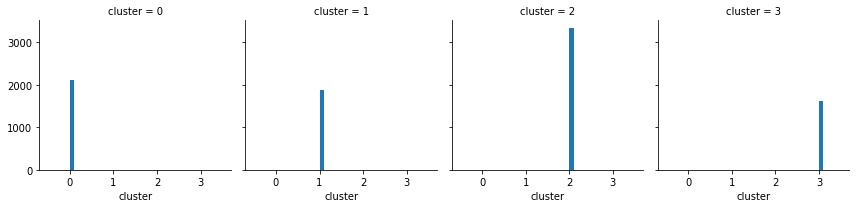

In [33]:
# Interpretasi klaster yang terbentuk
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='cluster')
    grid.map(plt.hist, c)

**Cluster 0 - Saldo dan kredit limit kecil, purchases dan payment sangat kecil**

Saldo dibawah 4900. Purchases sangat kecil diantara cluster lain. Credit Limit dibawah 10000. Payments sangat sedikit.

**Cluster 1 Saldo medium, purchases rata-rata, credit limit tinggi payment rata-rata**

Saldo diatas 5000 dan dibawah 12000. Purchases dibawah 15000, dan dinatara 20000-30000. Credit limit 20000. Payments dibawah 23000.

**Cluster 2 Saldo sangat kecil, purchases kecil, kredit limit rata-rata. payment kecil**

Saldo sangat kecil. Purchases kecil. Credit limit dibawah 18000. Payments dibawh 12000.

**Cluster 3 Saldo paling banyak, purchases tinggi,credit limit paling banyak.payment paling tinggi**

Saldo diatas 15000. Purchases dibawah 150000. Credit limit diatas 20000. Payments diatas 20000


# Conculsion

Dari hasil diatas, dapat ditarik kesimpulan bahwa 
1. Project ini menggunakan penerapan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang akan digunakan yaitu K-Means Clustering dan K-Medoids dan menghasilkan nilai evaluasi sihoutee paling baik oleh k-means clustering.
2. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan, menggunakan 14 atribut.
3. Menghasilkan 4 klaster yaitu:
> - cluster 0 Saldo dan kredit limit kecil, purchases dan payment sgt kecil
> - cluster 1 saldo medium, purchases dan payment rata-rata. credit limit tinggi
> - clsuter 2 saldo sgt kecil purchases dan payment kecil, credit limit rata-rata.
> - clutser 3 saldo dan kreidt limit paling banyak, purchases dan payment paling tinggi

In [36]:
pickle.dump(model1, open('modelfp4.pkl','wb'))